January 19, 2016 - Women in Data Science ATX Meetup - "Data Science from Scratch" Workshop
# Artificial Neural Network

Large neural networks (aka Deep Learning) are the current hot-topic in machine learning. In this workshop, you will learn to build and evaluate alternative neural network models using the MNIST handwritten digits dataset.


### Import Libraries

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
% matplotlib inline

# 1  What is a Neural Net?
*"A neural network (aka multilayer perceptron) is a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs."*


![biological_neuron](images/biological_neuron.png)

- Inspired by biological nervous systems neural network works
- Works similar to human brain and acquires knowledge through learning by examples
- Knowledge is stored within the interconnected strengths known as synaptic weight
- Often referred to as a "black box" algorithm

# 2  Advantages Over Conventional Techniques
- Becoming increasingly popular because of massive dataset availibility and powerful computing 
- Remarkable ability to derive meaning from complicated or imprecise data
- Extract patterns and detect trends that are too complex or noisy to be discovered
- Applies to problems where the relationships may be quite dynamic or non-linear
- Ability to adapt and learn in real-time (e.g. recurrent neural networks)


# 3  How do they work?
The simplest and most known neural network type is the __multilayer perceptron (MLP)__. It typically includes an *__input layer__*, one or several *__hidden layers__*, and an *__output layer__*.

![layers](images/layers.png)

- __Forward Propagation__ -- feeds a batch of inputs by applying weights and activation function for the next layer 
- __Activation Function__ -- sigmoid function output varies continuously but not linearly as the input changes. it bears greater resemblence to how neurons operate than linear activitation function


![activation](images/activation.png)


- __Backward Propagation__ -- calculates how the error changes as each weight is increased or decreased slightly then back-calculates the error associated with each unit from the preceding layer
- __Learning/Optimization__ -- new weights are adjusted/updated based on the resulting error from previously used weights using gradient descent


![gradient_descent](images/gradient_descent.png)


- __Dropout__ -- is a technique addressing the common overfitting problems in large neural networks (deep learning). The key idea is to randomly drop units (along with their connections) from the neural network during training. gives major improvements over other regularization methodsgives major improvements over other regularization methods


![dropout](images/dropout.png)

# 4  Simple Intuition with Numpy

In [2]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ]) # batch input X = (4x3)
y = np.array([[0],[1],[1],[0]])                   # batch label y = (4x1)
pd.DataFrame(np.concatenate((X,y),axis=1),columns=['x1','x2','x3','y'])

,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,1,1,1,0


In [3]:
# Activation Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
# Weight Initialization
np.random.seed(1337) # for reproducibility
w_01 = 2*np.random.random((3,4)) - 1
w_12 = 2*np.random.random((4,1)) - 1

![forward_back](images/forward_back_prop.png)

#### gradient descent review: https://github.com/JostineHo/neural-nets/blob/master/gradient_descent_math.ipynb

In [5]:
# Learning through Multiple Iterations -- implements gradient descent to minimize cost function
# for j in range(300): 

# Forward Propagation -- feeds a batch of inputs(batch size = 4, the number of examples in X)
#                        by applying weights and activation function for the next layer 
layer1 = sigmoid(np.dot(X, w_01))
layer2 = sigmoid(np.dot(layer1, w_12))

# Backward Propagation -- calculates how the error changes as each weight is increased or decreased slightly
#                         then back-calculates the error associated with each unit from the preceding layer 
layer2_delta = (y - layer2)*(layer2*(1-layer2))
layer1_delta = layer2_delta.dot(w_12.T)*(layer1*(1-layer1))

# Learning Step -- new weights are adjusted/updated based on the resulting error from previously used weights
w_12 += layer1.T.dot(layer2_delta)
w_01 += X.T.dot(layer1_delta)

In [6]:
# Prediction -- final forward propagated output from using the latest learned weights 
layer1 = sigmoid(np.dot(X, w_01))
layer2 = sigmoid(np.dot(layer1, w_12))
# Softmax -- probablity output from sigmoid (without threshold round up to 1 or 0)
yhat = layer2 
pd.DataFrame(np.concatenate((yhat,y),axis=1),columns=['yhat','y'])

,yhat,y
0,0.517182,0.0
1,0.566938,1.0
2,0.510251,1.0
3,0.560003,0.0


# 5  The MNIST Dataset
<img src="images/mnist.png\" alt="alt text" align="middle" height=300 width=300/>

- MNIST is a database containing images of handwritten digits, with each **28 pixels by 28 pixels** image labeled by integer
- This data has been preprocessed and organised to make it easy to use with various algorithms
- The set __X_train__ contains __60,000 samples of training data__ with corresponding labels (y_train)
- The set __X_test__ contains __10,000 samples of test data__ with corresponding labels (y_test)

### Import Database

In [7]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


- __X_train__ is a tensor of shape (60000, 28, 28) containing, for each training grayscale image, the value of each pixel which is a int in [0;255]
- __y_train__  is a tensor of shape (60000, 1) containing, for training test image, the label of each image which is an int in [0;9]
- __X_test__  is a tensor of shape (10000, 28, 28) containing, for each test grayscale image, the value of each pixel which is a int in [0;255]
- __y_test__  is a tensor of shape (10000, 1) containing, for each test image, the label of each image which is an int in [0;9]

![x_train](images/X_train.png)

In [8]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print('X_train shape:', X_train.shape)
# Each image in MNIST has a corresponding label, a number between 0 and 9 
# representing the digit drawn in the image
print('y_train shape:', y_train.shape) 
y_train[1]

60000 train samples
10000 test samples
X_train shape: (60000, 28, 28)
y_train shape: (60000,)


0

### Reshape Image Data
![pixels28x28](images/pixels28x28.png)

In [9]:
# Scale each entry in the tensor so that pixel intensity can be represented as a float between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
# Flatten each 2D image data to an 1D array as model input (28*28=784)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [11]:
from keras.utils import np_utils
# In this dataset, we will convert our labels to "one-hot vectors". A one-hot vector is
# a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the
# nth digit will be represented as a vector which is 1 in the nth dimension. 
nb_classes = 10 # One class per digit
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

### Plot Sample Image and Label Data

Corresponding Label:  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


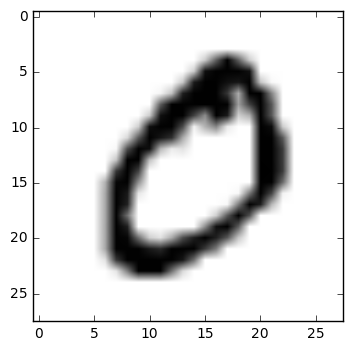

In [12]:
sample_n = 1
plt.imshow(X_train[sample_n].reshape(28,28), cmap='binary')
print('Corresponding Label: ', y_train[sample_n])

# 6  Simple Multilayer Perceptron with Keras

There are many relatively new libraries for using neural networks (Caffe, Theano, Torch ..etc), but there isn't yet a single standard. We will use Keras, which is arguably the most popular library for machine learning. [Keras](https://keras.io/) is a high level and easy to use library that allows us to build out our neural network in layers. 


### Import Keras

In [13]:
import tensorflow as tf
from keras import backend as K
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adadelta
from keras.utils import np_utils

You will now experiment with different neural network architectures (e.g. number and size of hidden layers), levels of dropout, and number of variables entering the network.

### Define the model achitecture

In [14]:
model = Sequential()
# Hidden Layer 1
model.add(Dense(512, input_shape=(784,))) # --> 1st hidden layer requires specification of X input shape (1D array)
model.add(Activation('relu'))
model.add(Dropout(0.2))
# Hidden Layer 2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# Output Layer 
model.add(Dense(nb_classes))     # --> outputs classification in the form of one-hot encoding vectors         
model.add(Activation('softmax')) # --> score as probability for each class

### Make the network learn from data

In [15]:
batch_size = 128 # Number of images used in each optimization step
nb_classes = 10  # Number of different classes
nb_epoch = 5     # Number of times the whole data is used to learn

# Keras Optimizers:
sgd = SGD()
rms = RMSprop()
ada = Adadelta()

# The function to optimize is the cross entropy between the true label and the output (softmax) of the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adadelta', # Select an optimizer: 'sgd', 'rms', 'adadelta'
              metrics=["accuracy"])
 
# Train the model
model.fit(X_train, y_train,
          batch_size=batch_size, 
          nb_epoch=nb_epoch,
          verbose=2,
          validation_data=(X_test, y_test))
 
# Evaluate model performance on the test set
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
6s - loss: 0.3575 - acc: 0.8948 - val_loss: 0.1615 - val_acc: 0.9511
Epoch 2/5
6s - loss: 0.1537 - acc: 0.9554 - val_loss: 0.1073 - val_acc: 0.9676
Epoch 3/5
5s - loss: 0.1103 - acc: 0.9668 - val_loss: 0.0875 - val_acc: 0.9728
Epoch 4/5
5s - loss: 0.0872 - acc: 0.9735 - val_loss: 0.0803 - val_acc: 0.9747
Epoch 5/5
5s - loss: 0.0727 - acc: 0.9782 - val_loss: 0.0695 - val_acc: 0.9769
Test score: 0.0695402466709
Test accuracy: 0.9769


### Perform several trainings to find the best architecture
Every time you try a new network, write down your predictions for how this network's performance will compare to your previous networks' performance in terms of __execution speed__, __training error__, and __validation error__. This will give you a better sense of which parameters to tune in order to build the final model architecture for this particular dataset. Find trade off between accuracy and model complexity.

# 7  Applications in Deep Learning

### Pattern Recognition

- [Self-Driving Cars](http://www.bloomberg.com/features/2015-george-hotz-self-driving-car/): A hobbyist is able to teach his car to self-drive in a few hours. 
- [Music Composition](http://web.mit.edu/felixsun/www/neural-music.html): Music can be composed based on different composer styles.
- [Predict the Future](http://news.mit.edu/2016/teaching-machines-to-predict-the-future-0621): Well, that's the claim by these folks at MIT

### Image Classification
- [Location Identification from Photographs](https://www.technologyreview.com/s/600889/google-unveils-neural-network-with-superhuman-ability-to-determine-the-location-of-almost/): Google is able to identify the location of where a photograph is taken just my analyzing the scene.
- [Face Identification](http://gitxiv.com/posts/fDJ7nHHou57aLEjBQ/the-megaface-benchmark-1-million-faces-for-recognition-at): Face recognition is so common that it is no longer surprising.

### Natural Language Processing
- [Realtime Speech Translation](http://blogs.skype.com/2014/12/15/skype-translator-how-it-works/): Microsoft Skype is able to translate voice into different languages in realtime. Something straight out of the universal translator in Star Trek. 

### More Applications
http://www.deeplearningpatterns.com/doku.php/applications?utm_content=buffer98aea&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer